In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')


In [3]:
accre = pd.DataFrame(accre)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [4]:
#deleting the value M from USEDMEM column
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [5]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME']).dt.total_seconds()
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME']).dt.total_seconds()
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,172800.0,793.0,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,72000.0,18586.0,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,54000.0,15070.0,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,302400.0,67776.0,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,432000.0,52.0,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,432000.0,2091.0,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,432000.0,243.0,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,432000.0,673.0,1,1,1,turing,0:0,COMPLETED


In [6]:
#converting the data from seconds to days, hours, seconds

accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit='S')
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit='S')
accre

/var/folders/bk/4_dns4_x6z3_rrb8824x_td40000gn/T/ipykernel_14873/578149155.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'], unit='S')
/var/folders/bk/4_dns4_x6z3_rrb8824x_td40000gn/T/ipykernel_14873/578149155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'], unit='S')


,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED


In [7]:
accre_usedmem = accre['USEDMEM'].value_counts()

In [8]:
accre_REQTIME = accre['REQTIME'].value_counts()

In [65]:
accre_USEDTIME = accre['USEDTIME'].value_counts()

In [66]:
#calculating the distribution
accre_diff = (accre_usedmem / accre_USEDTIME).fillna(0)
accre_diff

0 days 00:00:00    0.0
0 days 00:00:01    0.0
0 days 00:00:02    0.0
0 days 00:00:03    0.0
0 days 00:00:04    0.0
                  ... 
999.97             0.0
9990.15            0.0
9990.72            0.0
9991.41            0.0
9996.42            0.0
Length: 133874, dtype: float64

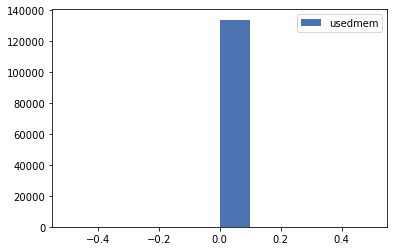

In [68]:
plt.style.use('seaborn-deep')
plt.hist([accre_diff], label=['usedmem', 'USEDTIME'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
accre['USEDTIME']*100/[accre['USEDMEM']], axis=1

***What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.***

In [11]:
#Creating a dataframe with the Maxwell information. 
maxwell = accre[accre['PARTITION'] == 'maxwell']
maxwell_df = pd.DataFrame(maxwell)
maxwell_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED,NaN
244,32883667,glasshouse,miya,374.38,0 days 04:00:00,0 days 00:16:06,1,1,1,maxwell,127:0,FAILED,NaN
462,32885245,glasshouse,brady,404.90,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED,NaN
467,32885270,glasshouse,brady,403.18,0 days 05:00:00,0 days 00:08:48,1,3,1,maxwell,0:0,COMPLETED,NaN
508,32885377,glasshouse,brodie,188.82,0 days 12:00:00,0 days 00:02:45,1,1,1,maxwell,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
335127,46542252,glasshouse,miya,6.57,2 days 00:00:00,0 days 00:00:34,1,6,4,maxwell,0:0,COMPLETED,NaN
335856,46577601,glasshouse,tamara,1.98,3 days 08:00:00,0 days 00:00:08,2,12,6,maxwell,0:0,COMPLETED,NaN
335916,46582283,glasshouse,jonnie,2068.21,2 days 00:00:00,2 days 00:00:38,1,6,4,maxwell,0:9,CANCELLED,NaN
335984,46586533,glasshouse,tamara,1.79,3 days 08:00:00,0 days 00:00:05,2,12,6,maxwell,0:0,COMPLETED,NaN


In [12]:
#converting the data into a diferent dtype. 
maxwell_regex = maxwell_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
maxwell_regex = pd.DataFrame(maxwell_regex)
maxwell_regex['USEDMEM'] = maxwell_regex['USEDMEM'].astype(float)
maxwell_regex

,USEDMEM
2,402.32
244,374.38
462,404.90
467,403.18
508,188.82
...,...
335127,6.57
335856,1.98
335916,2068.21
335984,1.79


In [13]:
maxwell_df['USEDMEM'].describe()

count     125501
unique     36985
top         5.53
freq       24156
Name: USEDMEM, dtype: object

In [14]:
#repeating the code for pascal. 
pascal = accre[accre['PARTITION'] == 'pascal']
pascal_df = pd.DataFrame(pascal)
pascal_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED,NaN
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED,NaN
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED,NaN
5,32880721,glasshouse,brady,403.40,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED,NaN
7,32880741,malanga,arline,1119.66,2 days 00:00:00,0 days 08:09:18,1,2,1,pascal,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336914,46753151,malanga,arline,29.85,2 days 00:00:00,0 days 00:14:28,1,2,1,pascal,0:0,COMPLETED,NaN
336915,46753169,malanga,arline,28.11,2 days 00:00:00,0 days 00:14:16,1,2,1,pascal,0:0,COMPLETED,NaN
336916,46753170,glasshouse,tamara,10007.76,0 days 20:00:00,0 days 00:29:16,1,5,4,pascal,0:0,COMPLETED,NaN
336917,46753171,malanga,arline,28.21,2 days 00:00:00,0 days 00:14:29,1,2,1,pascal,0:0,COMPLETED,NaN


In [15]:
pascal_regex = pascal_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
pascal_regex = pd.DataFrame(pascal_regex)
pascal_regex['USEDMEM'] = pascal_regex['USEDMEM'].astype(float)
pascal_regex

,USEDMEM
0,18.66
3,417.62
4,450.09
5,403.40
7,1119.66
...,...
336914,29.85
336915,28.11
336916,10007.76
336917,28.21


In [16]:
pascal_df['USEDMEM'].describe()

count     78046
unique    49225
top        5.53
freq       2363
Name: USEDMEM, dtype: object

In [17]:
#repeating the code for turing. 
turing = accre[accre['PARTITION'] == 'turing']
turing_df = pd.DataFrame(turing)
turing_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
80,32881540,virginia,garrett,4039.36,0 days 02:00:00,0 days 02:00:05,1,6,1,turing,0:0,COMPLETED,NaN
91,32882556,virginia,garrett,55.39,0 days 06:00:00,0 days 06:00:05,1,6,1,turing,0:0,COMPLETED,NaN
92,32882567,virginia,garrett,281.12,0 days 06:00:00,0 days 06:00:05,1,6,1,turing,0:0,COMPLETED,NaN
93,32882568,virginia,garrett,57.32,0 days 06:00:00,0 days 06:00:17,1,6,1,turing,0:0,COMPLETED,NaN
172,32883336,virginia,erla,129.24,0 days 01:00:00,0 days 00:54:52,1,6,1,turing,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED,NaN
336934,46753820_26,harovin,porsha,5093.70,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED,NaN
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED,NaN
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED,NaN


In [18]:
turing_regex = turing_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
turing_regex = pd.DataFrame(turing_regex)
turing_regex['USEDMEM'] = turing_regex['USEDMEM'].astype(float)
turing_regex

,USEDMEM
80,4039.36
91,55.39
92,281.12
93,57.32
172,129.24
...,...
336933,137.96
336934,5093.70
336936,156.21
336942,2820.52


In [19]:
turing_df['USEDMEM'].describe()

count     74653
unique    42116
top        7.41
freq      15491
Name: USEDMEM, dtype: object

In [20]:
turing_df.mean(numeric_only=True)

NODES    1.003684
CPUS     2.934899
GPUS     1.076313
diff          NaN
dtype: float64

In [21]:
turing_regex.describe()

,USEDMEM
count,74653.000000
mean,3879.825237
std,10278.254973
min,0.000000
25%,7.410000
50%,1277.840000
75%,2423.260000
max,371247.350000


In [22]:
accre = accre[accre['USEDMEM'].notnull()].copy()
accre['USEDMEM'] = accre['USEDMEM'].astype(float).astype(str)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED,NaN
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED,NaN
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED,NaN
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED,NaN
5,32880721,glasshouse,brady,403.4,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED,NaN
336934,46753820_26,harovin,porsha,5093.7,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED,NaN
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED,NaN
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED,NaN


In [23]:
#checking the counts per state 
maxwell_df['STATE'].value_counts()
pascal_df['STATE'].value_counts()
turing_df['STATE'].value_counts()

COMPLETED              74348
CANCELLED                194
FAILED                    90
CANCELLED by 505355       11
CANCELLED by 161909        4
OUT_OF_MEMORY              3
CANCELLED by 756088        1
CANCELLED by 785491        1
CANCELLED by 46207         1
Name: STATE, dtype: int64

In [24]:
#Find all completed jobs 
accre_completed = (accre[accre.STATE == 'COMPLETED'])

In [25]:
accre_completed

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
0,32880657,malanga,arline,18.66,2 days 00:00:00,0 days 00:13:13,1,2,1,pascal,0:0,COMPLETED,NaN
2,32880718,glasshouse,brady,402.32,0 days 05:00:00,0 days 00:08:57,1,3,1,maxwell,0:0,COMPLETED,NaN
3,32880719,glasshouse,brady,417.62,0 days 20:00:00,0 days 05:09:46,1,1,1,pascal,0:0,COMPLETED,NaN
4,32880720,glasshouse,brady,450.09,0 days 15:00:00,0 days 04:11:10,1,1,1,pascal,0:0,COMPLETED,NaN
5,32880721,glasshouse,brady,403.4,3 days 12:00:00,0 days 18:49:36,1,1,1,pascal,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,5 days 00:00:00,0 days 00:00:52,1,1,1,turing,0:0,COMPLETED,NaN
336934,46753820_26,harovin,porsha,5093.7,5 days 00:00:00,0 days 00:34:51,1,6,1,turing,0:0,COMPLETED,NaN
336936,46753823,harovin,shannon,156.21,5 days 00:00:00,0 days 00:04:03,1,1,1,turing,0:0,COMPLETED,NaN
336942,46754095,harovin,shannon,2820.52,5 days 00:00:00,0 days 00:11:13,1,1,1,turing,0:0,COMPLETED,NaN


In [26]:
accre_completed.sort_values(['ACCOUNT', 'PARTITION'], ascending=False).groupby('USEDMEM')

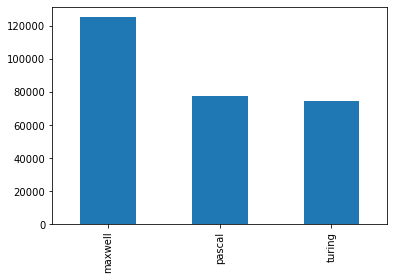

In [27]:
accre_completed['PARTITION'].value_counts().plot(kind = 'bar');

In [28]:
accre_completed.sort_values(['ACCOUNT', 'PARTITION'], ascending=False).groupby('ACCOUNT').head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
83877,41211739,white,brittani,122.54,0 days 02:00:00,0 days 02:00:29,1,9,3,maxwell,0:0,COMPLETED,NaN
84186,41292601,white,brittani,1924.31,0 days 02:00:00,0 days 02:00:14,1,9,3,maxwell,0:0,COMPLETED,NaN
84378,41321482,white,brittani,1316.61,0 days 05:00:00,0 days 00:02:31,1,9,3,maxwell,0:0,COMPLETED,NaN
84379,41321515,white,brittani,2432.36,0 days 10:00:00,0 days 00:06:26,1,9,3,maxwell,0:0,COMPLETED,NaN
84641,41365219,white,brittani,2356.98,0 days 01:00:00,0 days 00:57:14,1,9,3,maxwell,0:0,COMPLETED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49033,34195701,almonds,hazel,19711.11,5 days 00:00:00,2 days 06:16:28,1,6,1,turing,0:0,COMPLETED,NaN
54034,34509268,almonds,hazel,41911.95,2 days 00:00:00,0 days 00:03:51,1,6,1,turing,0:0,COMPLETED,NaN
54036,34510087,almonds,hazel,43511.08,2 days 00:00:00,0 days 00:25:30,1,6,1,turing,0:0,COMPLETED,NaN
54044,34512889,almonds,hazel,44437.83,2 days 00:00:00,0 days 08:06:46,1,6,1,turing,0:0,COMPLETED,NaN


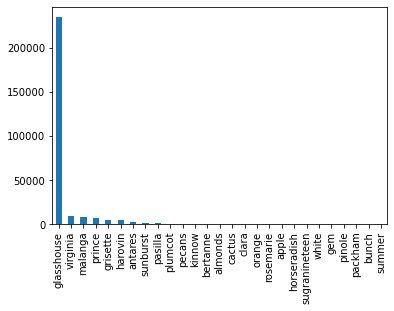

In [29]:
accre_completed['ACCOUNT'].value_counts().plot(kind = 'bar');

In [30]:
accre_completed.max()

JOBID                46754598
ACCOUNT                 white
USER                  yuliana
USEDMEM               9996.42
REQTIME      15 days 00:00:00
USEDTIME      8 days 03:15:34
NODES                      15
CPUS                      120
GPUS                       60
PARTITION              turing
EXITCODE                  0:0
STATE               COMPLETED
diff                      NaN
dtype: object

In [31]:
accre_failed = (accre[accre.STATE == 'FAILED'])
accre_failed

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
244,32883667,glasshouse,miya,374.38,0 days 04:00:00,0 days 00:16:06,1,1,1,maxwell,127:0,FAILED,NaN
1247,32896784,glasshouse,miya,19.59,0 days 00:30:00,0 days 00:09:54,1,1,1,pascal,127:0,FAILED,NaN
9370,32940928,glasshouse,arlyne,16331.96,1 days 06:00:00,1 days 06:00:16,7,7,32,pascal,1:0,FAILED,NaN
9371,32940936,glasshouse,arlyne,12423.11,0 days 20:00:00,0 days 20:00:02,7,7,24,maxwell,1:0,FAILED,NaN
14125,33017026,sunburst,demarcus,7.17,4 days 00:00:00,0 days 00:04:02,1,1,1,pascal,127:0,FAILED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333920,46498749,glasshouse,arlyne,2035.47,3 days 08:00:00,0 days 00:12:10,1,6,6,maxwell,1:0,FAILED,NaN
334706,46525496,glasshouse,mel,11823.83,5 days 00:00:00,2 days 02:00:25,3,12,16,pascal,1:0,FAILED,NaN
334782,46529224,glasshouse,lea,16.02,3 days 18:00:00,3 days 18:00:20,1,6,8,turing,1:0,FAILED,NaN
334786,46529453,glasshouse,lea,13022.09,3 days 08:00:00,3 days 08:00:00,1,7,8,pascal,1:0,FAILED,NaN


In [32]:
accre_failed.value_counts()

Series([], dtype: int64)

In [33]:
accre_failed.max()

JOBID               46647368
ACCOUNT             sunburst
USER                   wyman
USEDMEM              99688.5
REQTIME      5 days 00:00:00
USEDTIME     5 days 00:00:40
NODES                      9
CPUS                      70
GPUS                      32
PARTITION             turing
EXITCODE                 9:0
STATE                 FAILED
diff                     NaN
dtype: object

In [34]:
accre_failed.sort_values(['ACCOUNT', 'PARTITION'], ascending=False).groupby('USEDMEM').head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
14125,33017026,sunburst,demarcus,7.17,4 days 00:00:00,0 days 00:04:02,1,1,1,pascal,127:0,FAILED,NaN
15597,33047288,sunburst,demarcus,7.16,4 days 00:00:00,0 days 00:03:28,1,1,1,pascal,2:0,FAILED,NaN
69077,38682382,sunburst,demarcus,7.41,4 days 00:00:00,0 days 00:00:02,1,1,1,pascal,1:0,FAILED,NaN
69078,38682428,sunburst,demarcus,7.43,4 days 00:00:00,0 days 00:00:00,1,1,1,pascal,2:0,FAILED,NaN
69081,38682492,sunburst,demarcus,27.94,4 days 00:00:00,0 days 00:01:24,1,1,1,pascal,1:0,FAILED,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58174,35743046,almonds,hazel,2727.75,0 days 04:00:00,0 days 00:16:28,1,1,1,turing,1:0,FAILED,NaN
58470,35791180,almonds,hazel,2758.29,0 days 04:00:00,0 days 00:25:00,1,1,1,turing,1:0,FAILED,NaN
58804,35833435,almonds,hazel,2506.93,0 days 04:00:00,0 days 00:03:43,1,1,1,turing,1:0,FAILED,NaN
59074,35842575,almonds,hazel,70.55,0 days 04:00:00,0 days 00:02:03,1,1,1,turing,2:0,FAILED,NaN


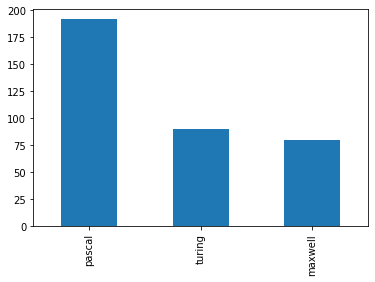

In [35]:
accre_failed['PARTITION'].value_counts().plot(kind = 'bar');

In [36]:
accre_failed.sort_values(['ACCOUNT', 'PARTITION'], ascending=False).groupby('ACCOUNT').head(10)

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE,diff
14125,33017026,sunburst,demarcus,7.17,4 days 00:00:00,0 days 00:04:02,1,1,1,pascal,127:0,FAILED,NaN
15597,33047288,sunburst,demarcus,7.16,4 days 00:00:00,0 days 00:03:28,1,1,1,pascal,2:0,FAILED,NaN
69077,38682382,sunburst,demarcus,7.41,4 days 00:00:00,0 days 00:00:02,1,1,1,pascal,1:0,FAILED,NaN
69078,38682428,sunburst,demarcus,7.43,4 days 00:00:00,0 days 00:00:00,1,1,1,pascal,2:0,FAILED,NaN
69081,38682492,sunburst,demarcus,27.94,4 days 00:00:00,0 days 00:01:24,1,1,1,pascal,1:0,FAILED,NaN
69082,38682556,sunburst,demarcus,336.09,4 days 00:00:00,0 days 00:19:00,1,1,1,pascal,1:0,FAILED,NaN
69085,38682778,sunburst,demarcus,314.55,4 days 00:00:00,0 days 00:18:55,1,1,1,pascal,1:0,FAILED,NaN
69094,38688341,sunburst,demarcus,340.33,4 days 00:00:00,0 days 00:20:00,1,1,1,pascal,1:0,FAILED,NaN
69107,38692864,sunburst,demarcus,344.84,4 days 00:00:00,0 days 00:18:01,1,1,1,pascal,1:0,FAILED,NaN
83236,41119140,sunburst,demarcus,7.41,4 days 00:00:00,0 days 00:00:02,1,2,2,pascal,1:0,FAILED,NaN


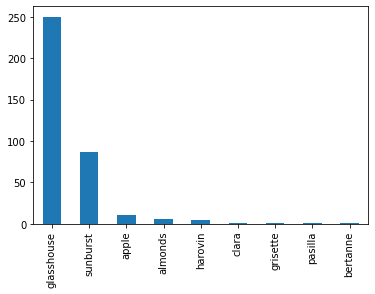

In [37]:
accre_failed['ACCOUNT'].value_counts().plot(kind = 'bar');

In [38]:
accre_failed_percentage = accre_failed['ACCOUNT'] / accre_failed['STATE']

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
accre_failed.max()

In [ ]:
accre_failed.value_counts()